# Start by importing the **JsonMidiCreator** library

In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter/[project]" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

## Write basic Chord progression

In [2]:
clip_chords = Chord("A", Scale("minor")) / Chord("F", Scale("Major")) / Chord("C", Scale("Major")) / Chord("G", Scale("Major"))

In [3]:
clip_chords << Foreach(2, 0, 1, 0)**Inversion() << Foreach(1, 2, 2, 2)**Octave()

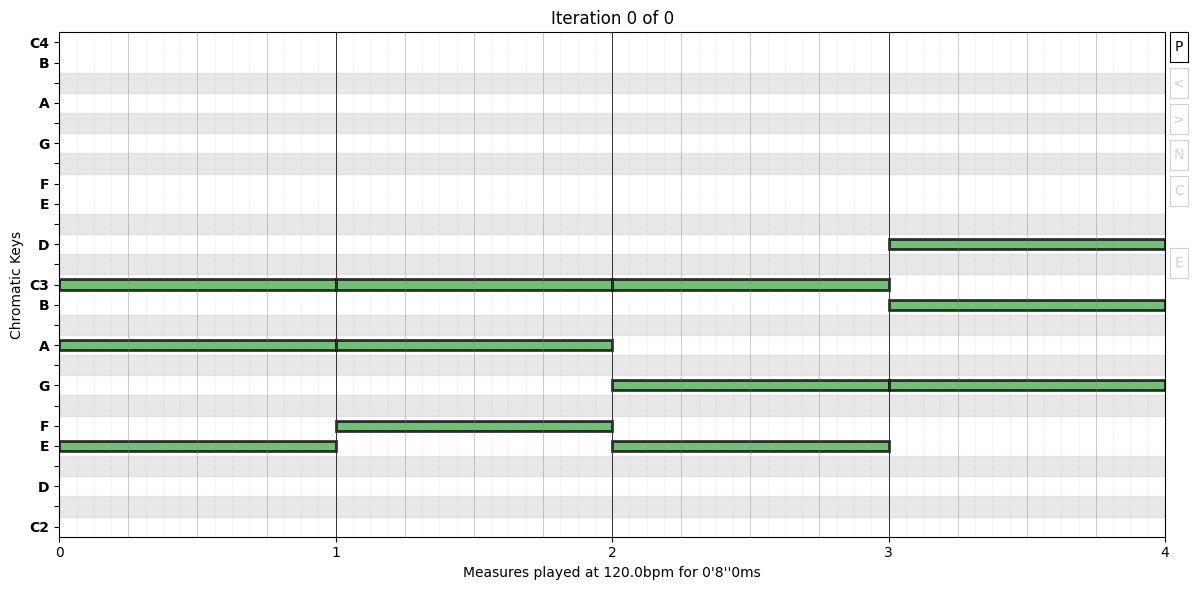

In [4]:
clip_chords >> Plot()

In [5]:
# Here the usage of ~ makes a copy of clip_chords
clip_bass = ~clip_chords << Octave(1) << Size(1) << Inversion(0)

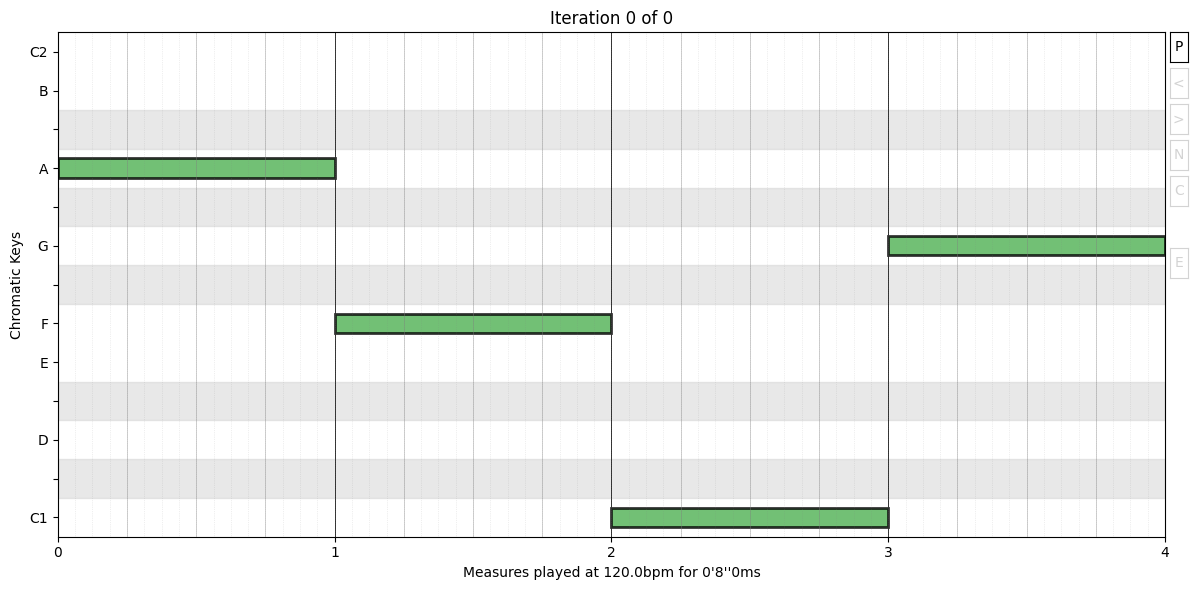

In [6]:
clip_bass >> Plot()

In [7]:
clip_togehter = clip_chords + clip_bass

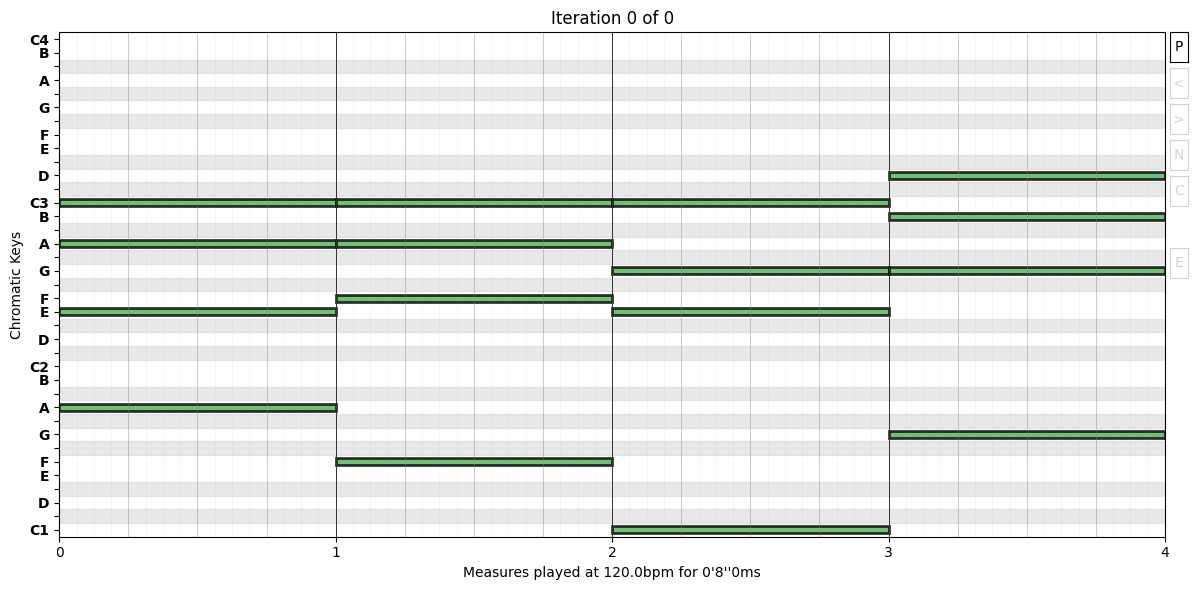

In [8]:
clip_togehter >> Plot()

In [9]:
clip_melody = ~clip_bass << Foreach(3, 3, 4, 3)**Octave()

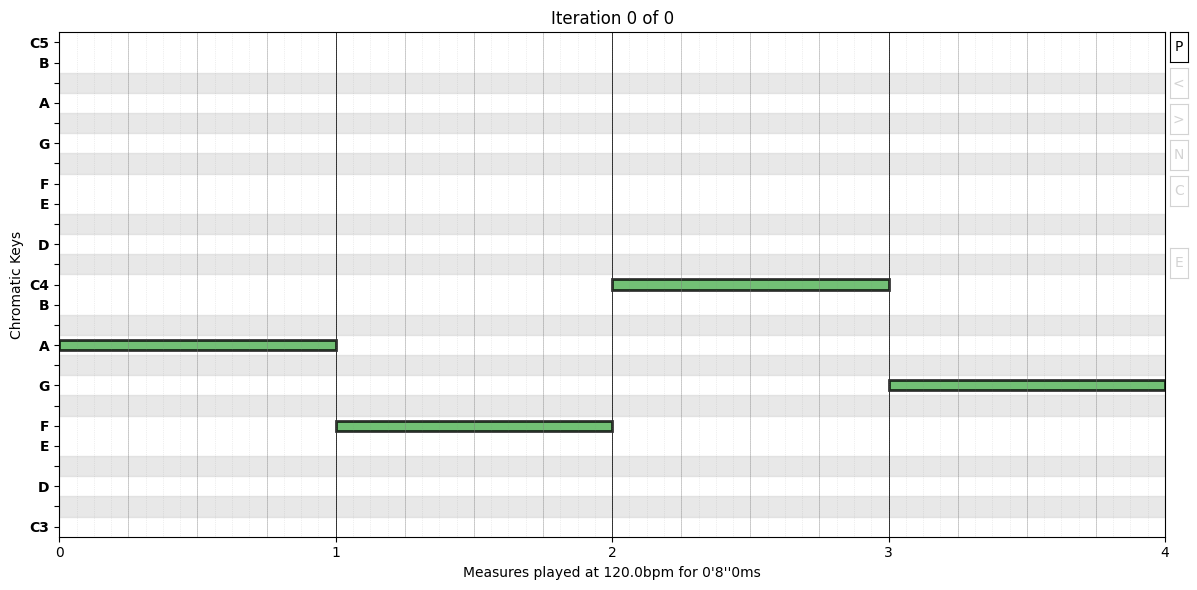

In [10]:
clip_melody >> Plot()

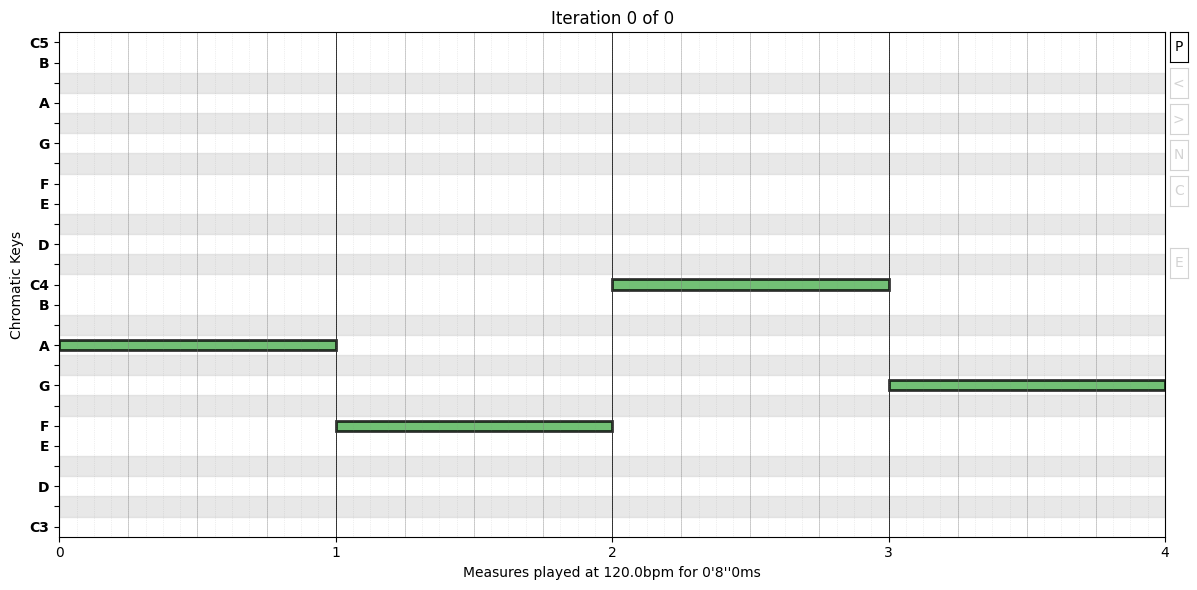

In [11]:
# `decompose` makes all `Chord` elements become a single note each
clip_melody.decompose() >> Plot()

In [12]:
# Divides the melody `Duration` by 4 while keeping the `Position`
clip_melody /= Duration(4)

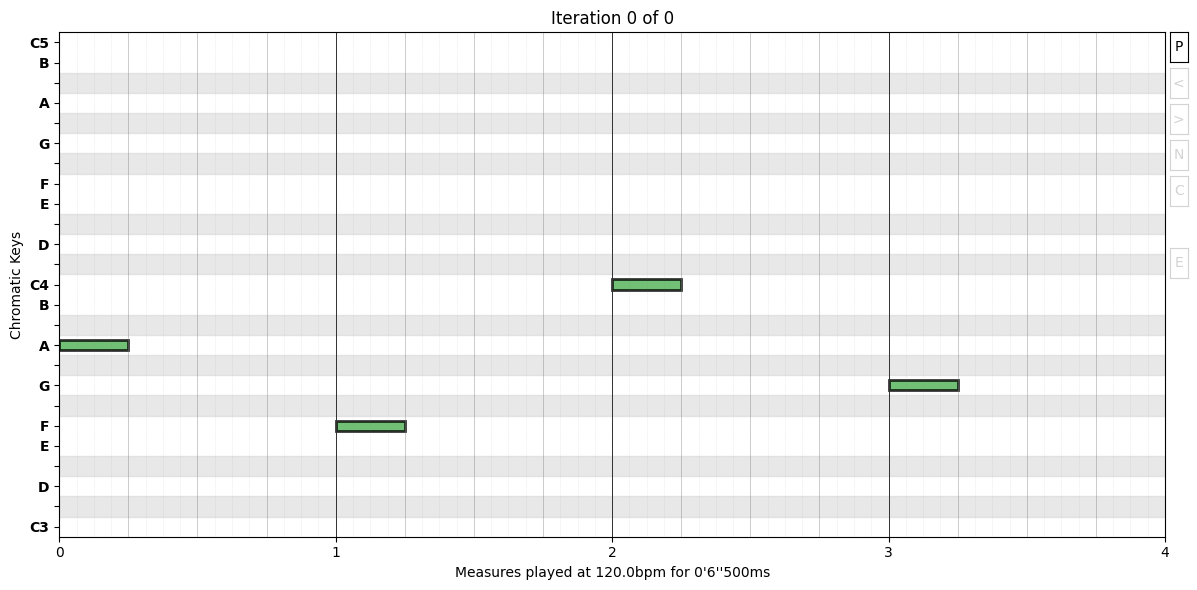

In [13]:
clip_melody >> Plot()

In [20]:
# This adds a copy of each note but in the next `Beat` each
clip_melody = clip_melody.__iadd__(Beats()) + clip_melody**Beats(1) + clip_melody**Beats(2) + clip_melody**Beats(3)

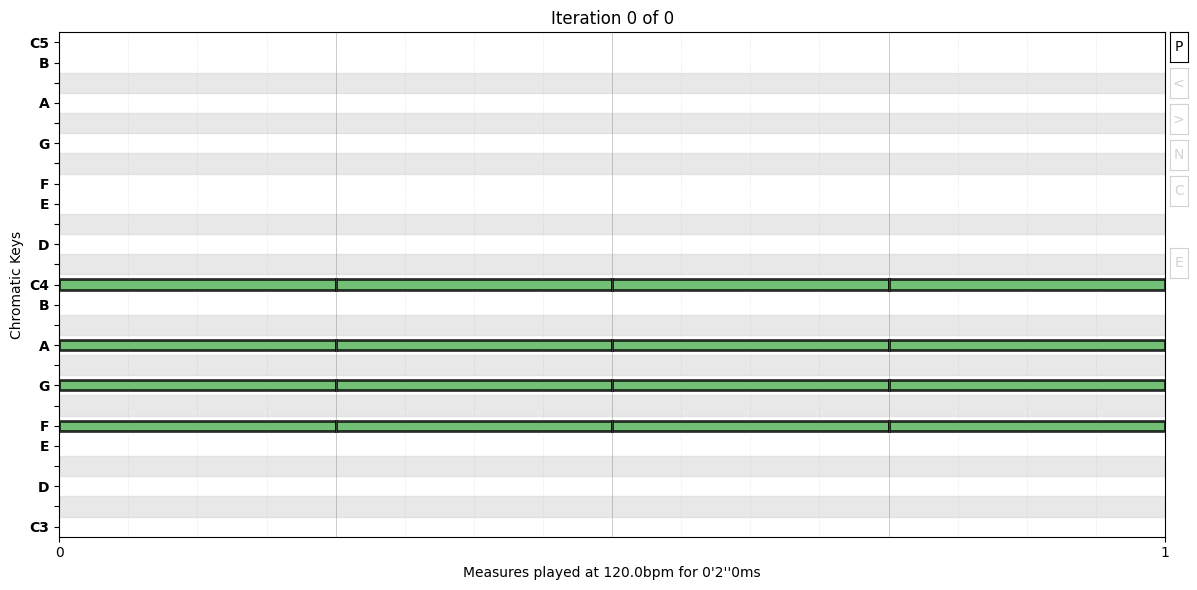

In [15]:
clip_melody >> Plot()

In [16]:
redundant_data = clip_melody + clip_melody

Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 57 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 53 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 60 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 55 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 57 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 53 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 60 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 55 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 57 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 53 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and Pitch 60 with same time start!
Warning (PLL): Ignored redundant Note on Channel 1 and

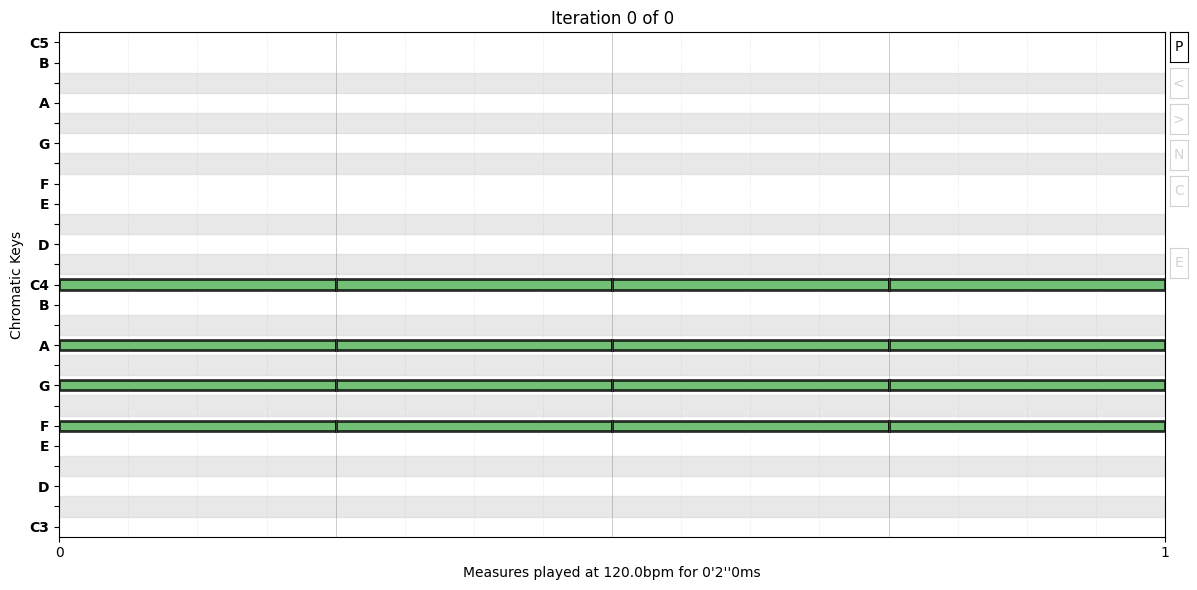

In [17]:
redundant_data >> Plot()

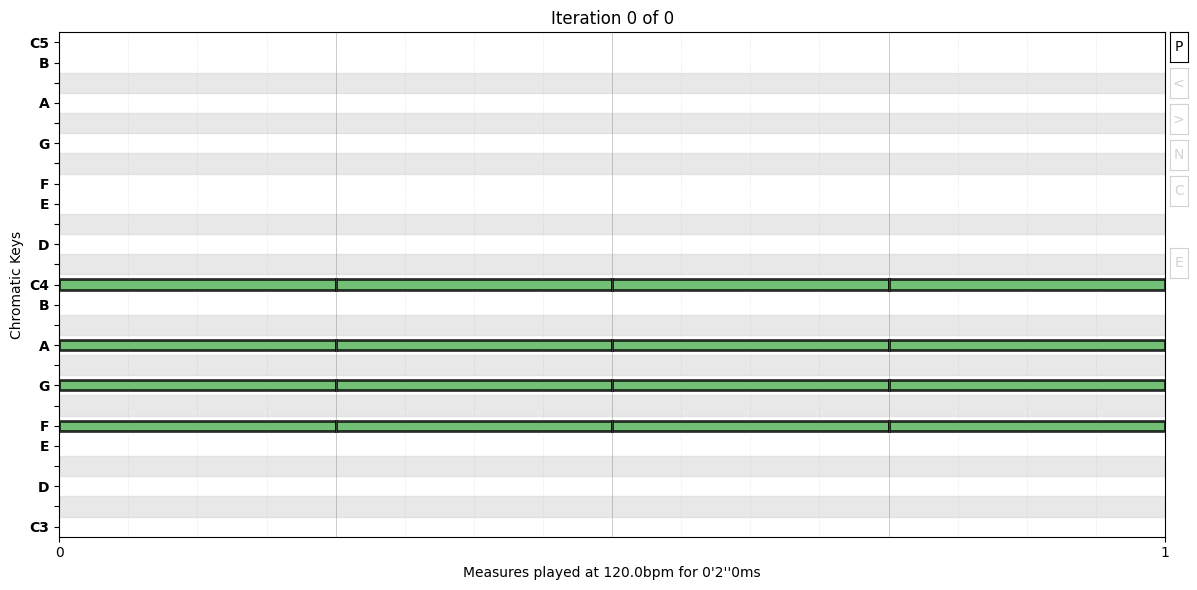

In [18]:
# The methos `purge` removes all redundant elements
redundant_data.purge() >> Plot()